# Auswertung Kerneldensity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import experiment

### Kerneldensity bei scalierten Datensätzen

In [16]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

base = pd.read_csv('additional_data/base.csv')

folder = 'scaled'
sets = experiment.load_imputed_sets(folder)


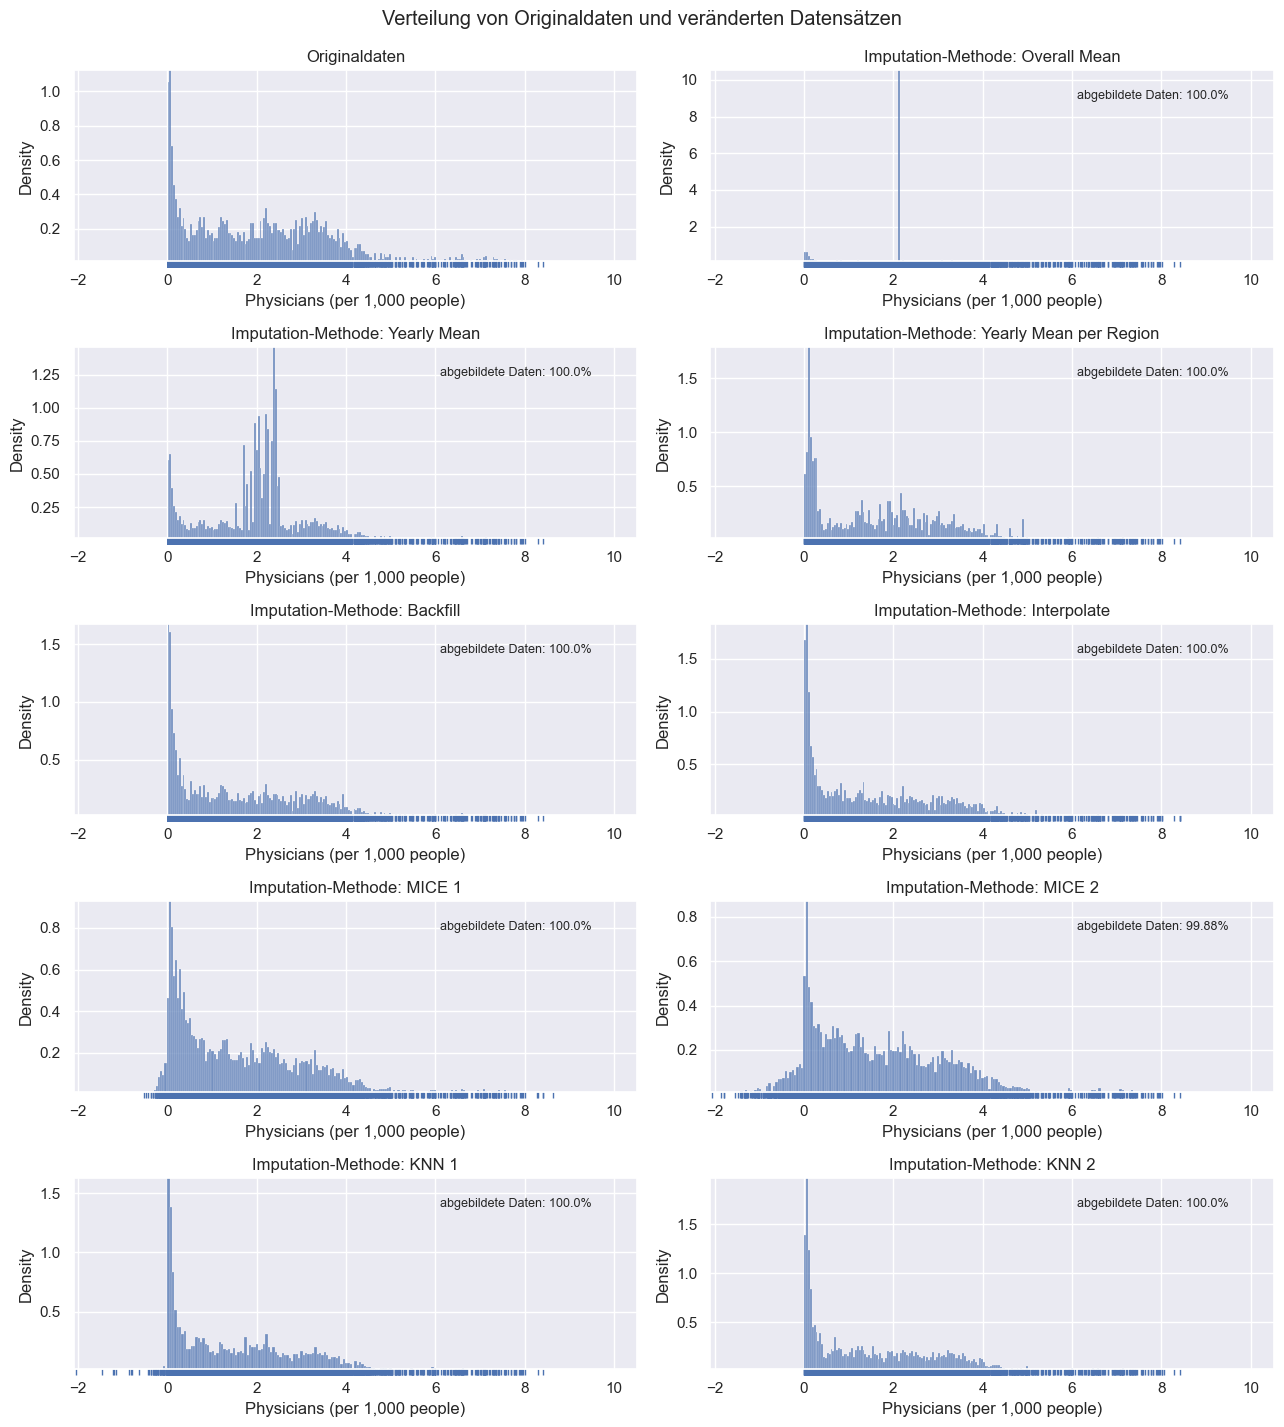

In [13]:
x='Physicians (per 1,000 people)'
sns.set_theme()
#sns.set_palette("tab10")

fig, axs = plt.subplots(5,2, figsize=(13, 15))
axs = axs.ravel()


df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])

#define boundaries around original data
df_min = df_base.stack().min()
df_max = df_base.stack().max()
xmin = df_min-(df_max-df_min)*0.25
xmax = df_max+(df_max-df_min)*0.25

sns.histplot(data=df_base.stack(), bins=200, stat='density', legend=False, ax=axs[0])
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=axs[0])
axs[0].set_title('Originaldaten')
axs[0].set_ylabel('Density')
axs[0].set_xlabel(x)
axs[0].set_xlim(xmin, xmax)


for idx, (name, df) in enumerate(sets.items()):
    df_i = df.loc[df['Indicator Name']==x].set_index(['Country Name', 'Indicator Name']).stack()
    total =len(df_i)
    df_i = df_i.loc[(df_i>xmin) & (df_i<xmax)]
    frac =len(df_i)
    sns.histplot(data=df_i, bins=200, stat='density', legend=False, ax=axs[idx+1])
    sns.rugplot(data=df_i, height=-.03, clip_on=False, ax=axs[idx+1])
    axs[idx+1].text(0.65, 0.9, f"abgebildete Daten: {round((frac/total)*100, 2)}%", 
                    ha="left", va="top", transform=axs[idx+1].transAxes, fontsize=9)

    axs[idx+1].set_title(f'Imputation-Methode: {name}')
    axs[idx+1].set_ylabel('Density')
    axs[idx+1].set_xlabel(x)
    axs[idx+1].set_xlim(xmin, xmax)
    
plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
#plt.savefig('figures/results/density_physicians')

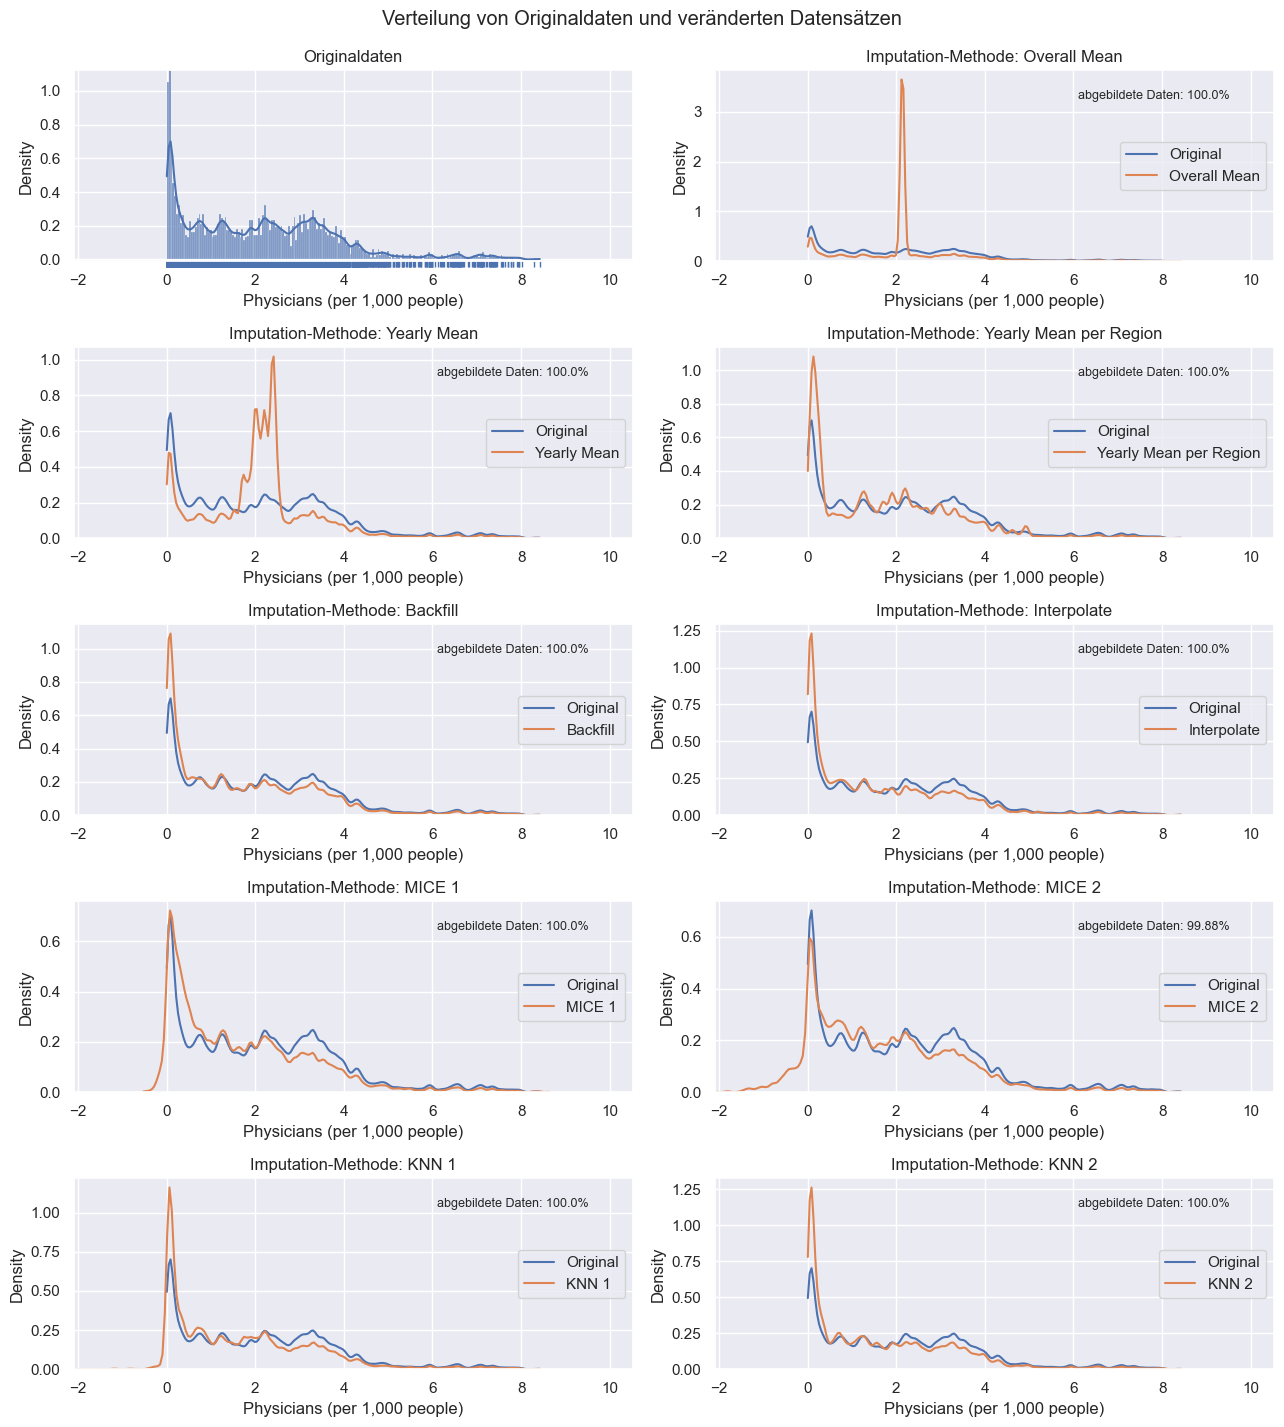

In [34]:
x='Physicians (per 1,000 people)'
#x='School enrollment, primary (% net)'
sns.set_theme()
#sns.set_palette("tab10")

fig, axs = plt.subplots(5,2, figsize=(13, 15))
axs = axs.ravel()


df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])

#define boundaries around original data
df_min = df_base.stack().min()
df_max = df_base.stack().max()
xmin = df_min-(df_max-df_min)*0.25
xmax = df_max+(df_max-df_min)*0.25

sns.histplot(data=df_base.stack(), bins=200, stat='density', legend=False, ax=axs[0])
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=axs[0])
sns.kdeplot(data=df_base.stack(), ax=axs[0], label='Original', cut=0, bw_adjust=0.2, color='b')
axs[0].set_title('Originaldaten')
axs[0].set_ylabel('Density')
axs[0].set_xlabel(x)
axs[0].set_xlim(xmin, xmax)


for idx, (name, df) in enumerate(sets.items()):
    df_i = df.loc[df['Indicator Name']==x].set_index(['Country Name', 'Indicator Name']).stack()
    total =len(df_i)
    df_i = df_i.loc[(df_i>xmin) & (df_i<xmax)]
    frac =len(df_i)
    sns.kdeplot(data=df_base.stack(), ax=axs[idx+1], label='Original', cut=0, bw_adjust=0.2)
    sns.kdeplot(data=df_i, ax=axs[idx+1], label=name, cut=0, bw_adjust=0.2)    
    #sns.rugplot(data=df_i, height=-.03, clip_on=False, ax=axs[idx+1])
    axs[idx+1].text(0.65, 0.9, f"abgebildete Daten: {round((frac/total)*100, 2)}%", 
                    ha="left", va="top", transform=axs[idx+1].transAxes, fontsize=9)

    axs[idx+1].set_title(f'Imputation-Methode: {name}')
    axs[idx+1].legend(loc='right')
    axs[idx+1].set_ylabel('Density')
    axs[idx+1].set_xlabel(x)
    axs[idx+1].set_xlim(xmin, xmax)
    
plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.savefig('figures/results/density_physicians')

Overall Mean min:19.18834, max:100.0
Yearly Mean min:19.18834, max:100.0
Yearly Mean per Region min:19.18834, max:100.0
Backfill min:19.18834, max:100.0
Interpolate min:19.18834, max:100.0
MICE 1 min:19.18834000000001, max:108.0709857751004
MICE 2 min:19.18834, max:114.28012689857184
KNN 1 min:-0.2133625542082171, max:113.22109343468418
KNN 2 min:19.18834, max:100.0


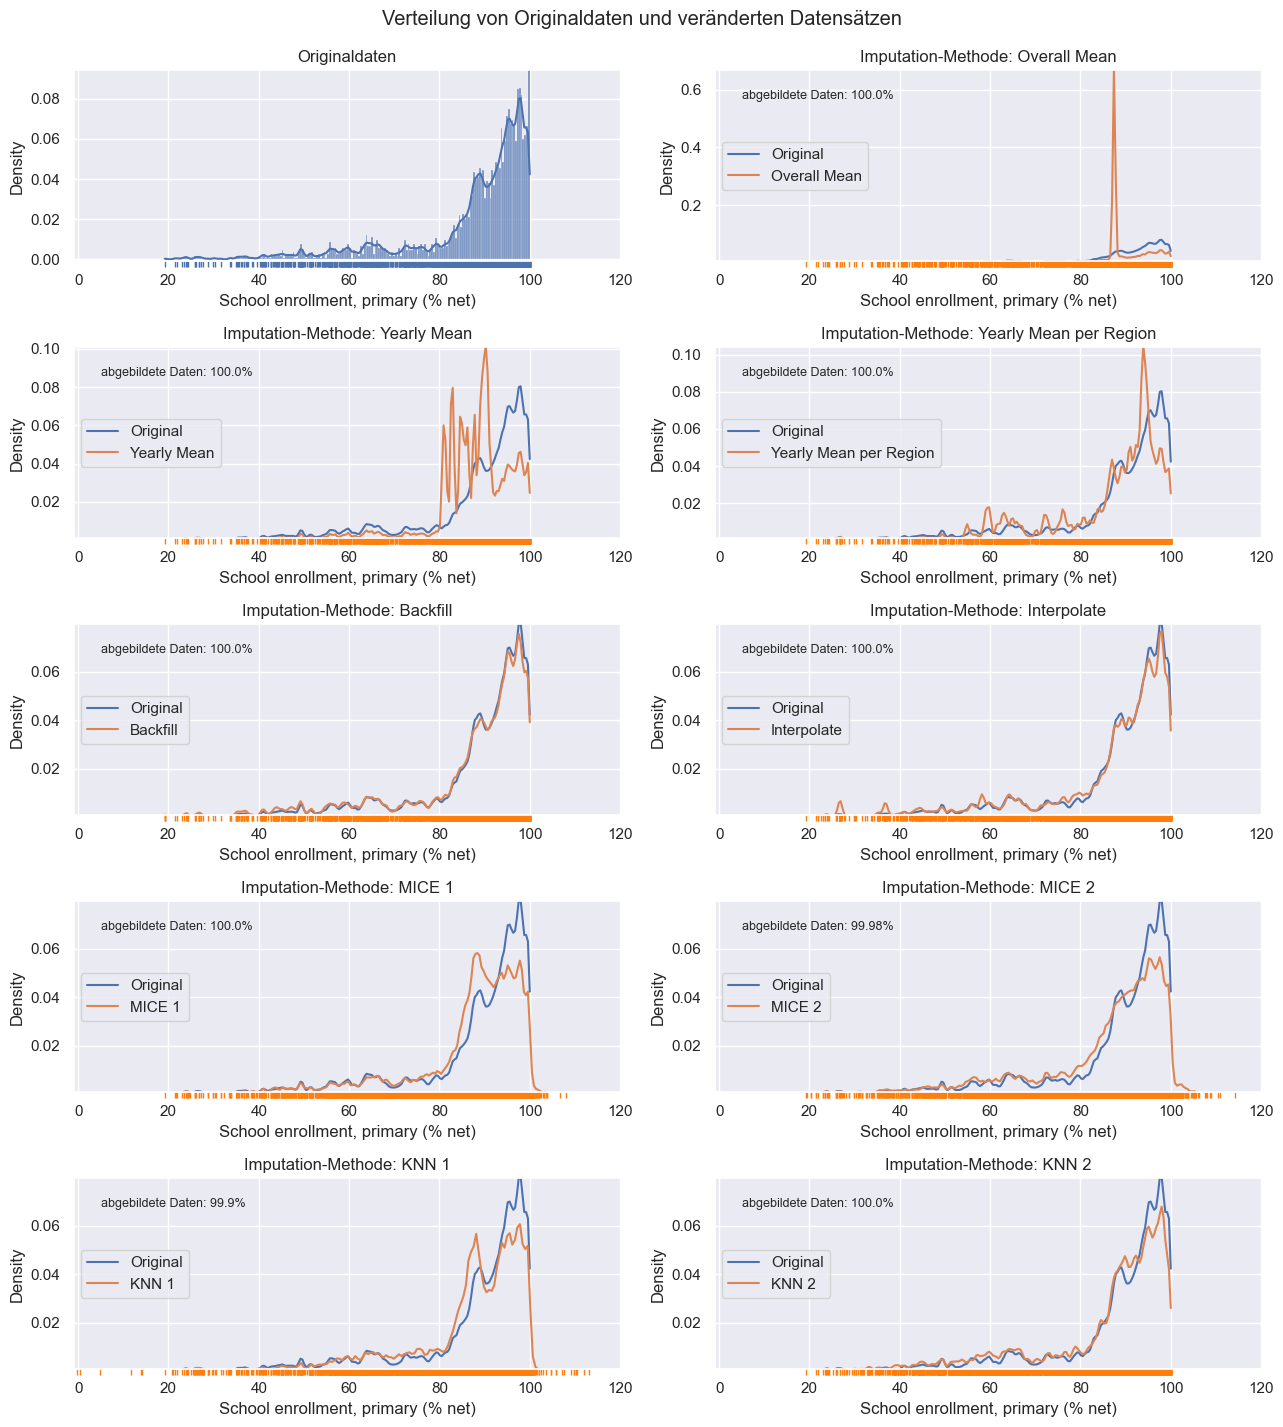

In [49]:
#x='Physicians (per 1,000 people)'
x='School enrollment, primary (% net)'
sns.set_theme()
#sns.set_palette("tab10")

fig, axs = plt.subplots(5,2, figsize=(13, 15))
axs = axs.ravel()


df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])

#define boundaries around original data
df_min = df_base.stack().min()
df_max = df_base.stack().max()
xmin = df_min-(df_max-df_min)*0.25
xmax = df_max+(df_max-df_min)*0.25

sns.histplot(data=df_base.stack(), bins=200, stat='density', legend=False, ax=axs[0])
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=axs[0])
sns.kdeplot(data=df_base.stack(), ax=axs[0], label='Original', cut=0, bw_adjust=0.15, color='b')
axs[0].set_title('Originaldaten')
axs[0].set_ylabel('Density')
axs[0].set_xlabel(x)
axs[0].set_xlim(xmin, xmax)


for idx, (name, df) in enumerate(sets.items()):
    df_i = df.loc[df['Indicator Name']==x].set_index(['Country Name', 'Indicator Name']).stack()
    total =len(df_i)
    df_i = df_i.loc[(df_i>xmin) & (df_i<xmax)]
    frac =len(df_i)
    sns.kdeplot(data=df_base.stack(), ax=axs[idx+1], label='Original', cut=0, bw_adjust=0.15)
    sns.kdeplot(data=df_i, ax=axs[idx+1], label=name, cut=0, bw_adjust=0.15)    
    sns.rugplot(data=df_i, height=-.03, clip_on=False, ax=axs[idx+1], color='tab:orange')
    axs[idx+1].text(0.05, 0.9, f"abgebildete Daten: {round((frac/total)*100, 2)}%", 
                    ha="left", va="top", transform=axs[idx+1].transAxes, fontsize=9)

    axs[idx+1].set_title(f'Imputation-Methode: {name}')
    axs[idx+1].legend(loc='center left')
    axs[idx+1].set_ylabel('Density')
    axs[idx+1].set_xlabel(x)
    axs[idx+1].set_xlim(xmin, xmax)
    print(f'{name} min:{df_i.min()}, max:{df_i.max()}')
    
plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.savefig('figures/results/density_school')

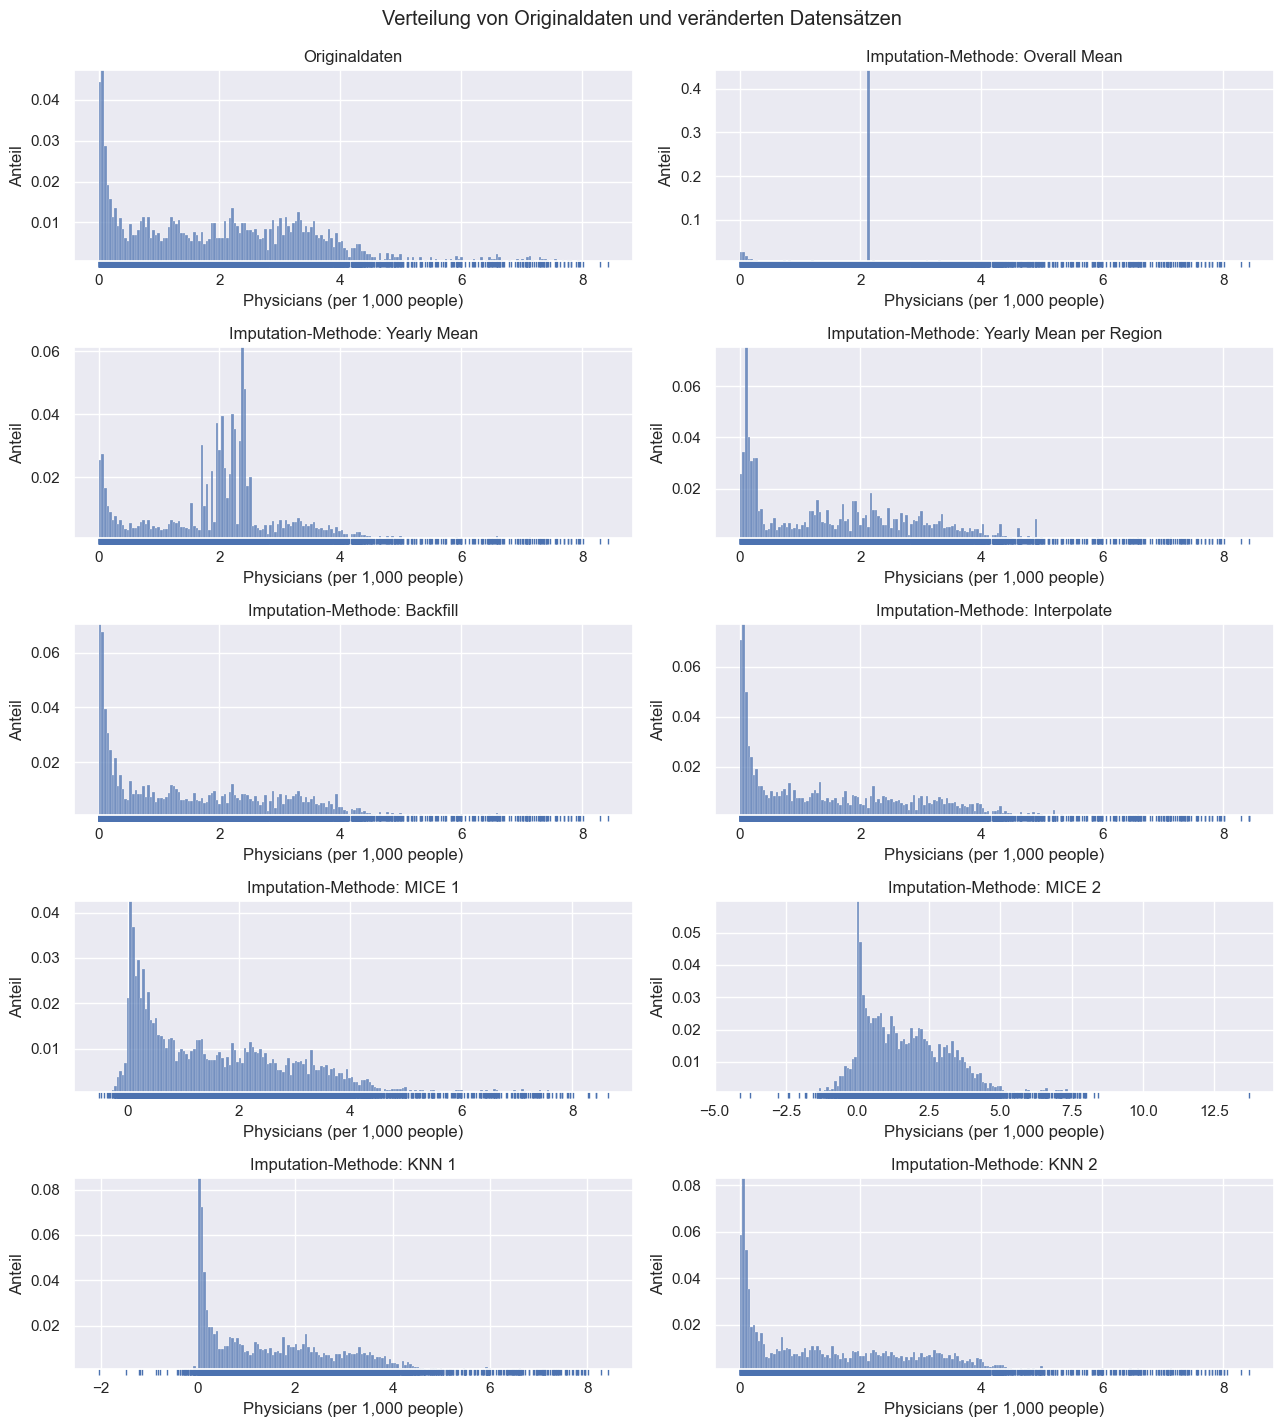

In [4]:
x='Physicians (per 1,000 people)'
sns.set_theme()
#sns.set_palette("tab10")

fig, axs = plt.subplots(5,2, figsize=(13, 15))
axs = axs.ravel()


df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
sns.histplot(data=df_base.stack(), bins=200, stat='proportion', legend=False, ax=axs[0])
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=axs[0])
axs[0].set_title('Originaldaten')
axs[0].set_ylabel('Anteil')
axs[0].set_xlabel(x)


for idx, (name, df) in enumerate(sets.items()):
    df_i = df.loc[df['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
    sns.histplot(data=df_i.stack(), bins=200, stat='proportion', legend=False, ax=axs[idx+1])
    sns.rugplot(data=df_i.stack(), height=-.03, clip_on=False, ax=axs[idx+1])
    axs[idx+1].set_title(f'Imputation-Methode: {name}')
    axs[idx+1].set_ylabel('Anteil')
    axs[idx+1].set_xlabel(x)


plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.savefig('figures/results/density_physicians_whole')

### Kerneldensity bei unscalierten Datensätzen

In [5]:
folder = 'unscaled'
sets = experiment.load_imputed_sets(folder)

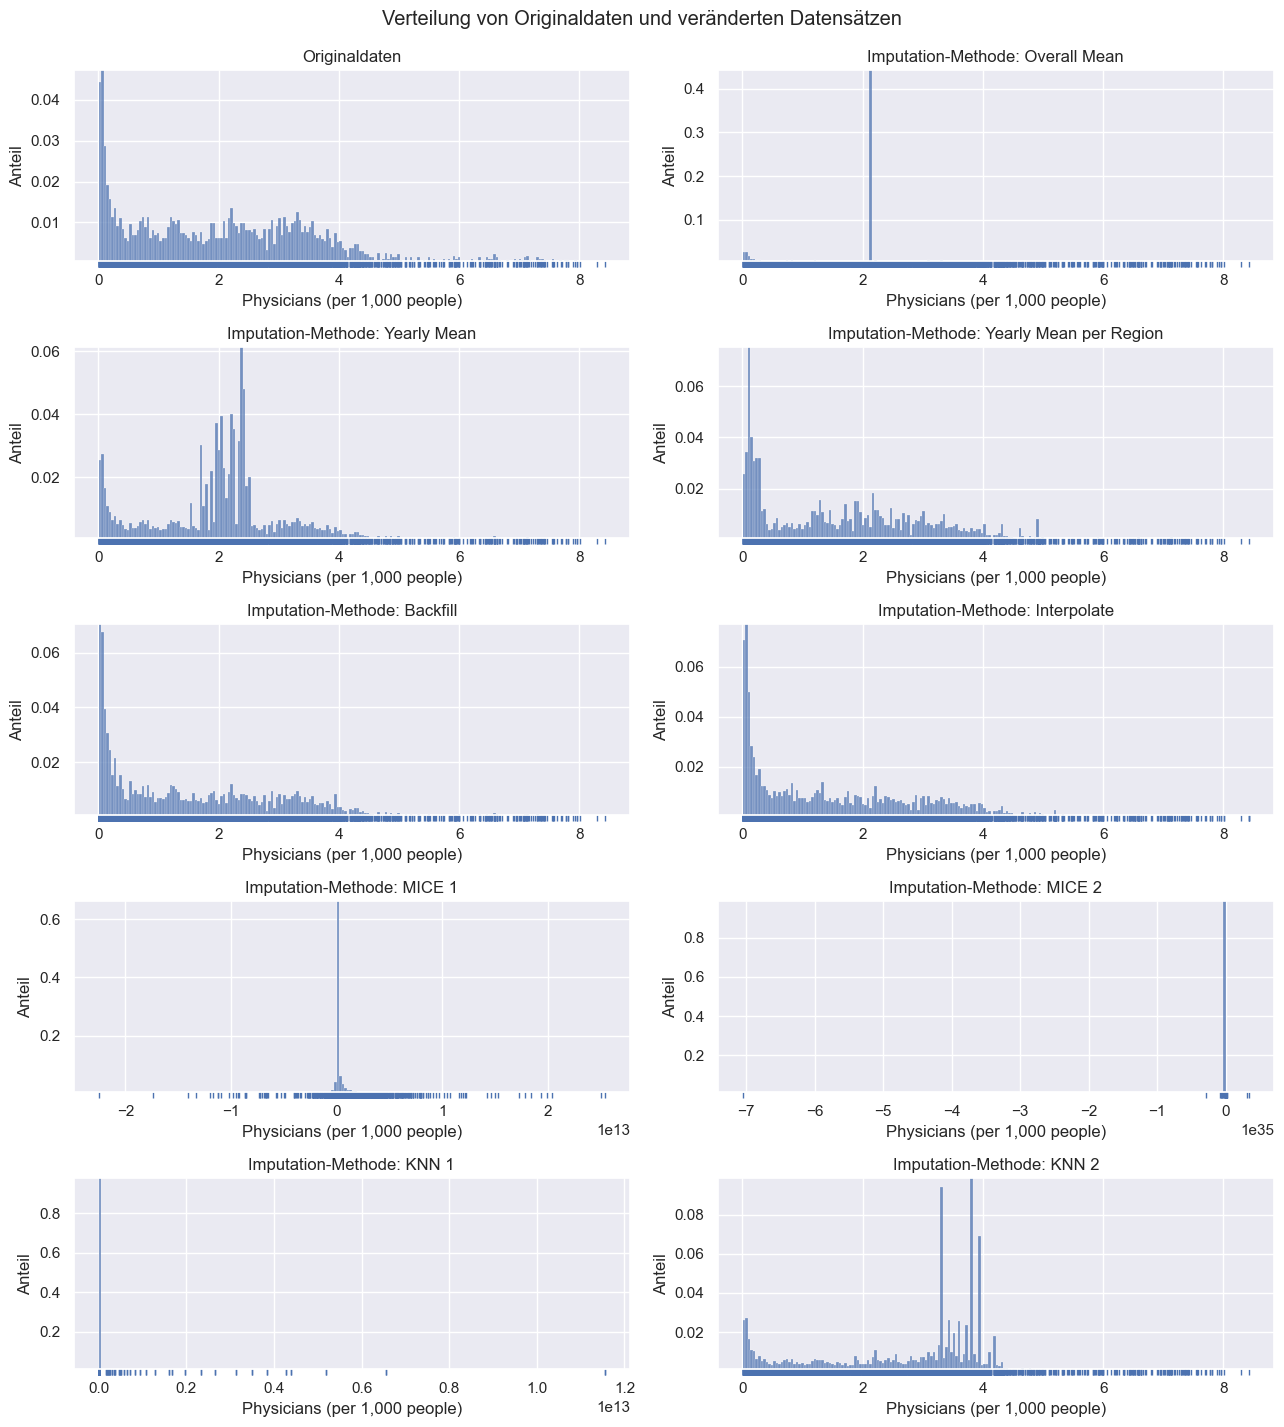

In [6]:
x='Physicians (per 1,000 people)'
sns.set_theme()
#sns.set_palette("tab10")

fig, axs = plt.subplots(5,2, figsize=(13, 15))
axs = axs.ravel()


df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
sns.histplot(data=df_base.stack(), bins=200, stat='proportion', legend=False, ax=axs[0])
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=axs[0])
axs[0].set_title('Originaldaten')
axs[0].set_ylabel('Anteil')
axs[0].set_xlabel(x)


for idx, (name, df) in enumerate(sets.items()):
    df_i = df.loc[df['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
    sns.histplot(data=df_i.stack(), bins=200, stat='proportion', legend=False, ax=axs[idx+1])
    sns.rugplot(data=df_i.stack(), height=-.03, clip_on=False, ax=axs[idx+1])
    axs[idx+1].set_title(f'Imputation-Methode: {name}')
    axs[idx+1].set_ylabel('Anteil')
    axs[idx+1].set_xlabel(x)


plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout(rect=[0, 0.03, 1, 0.99])

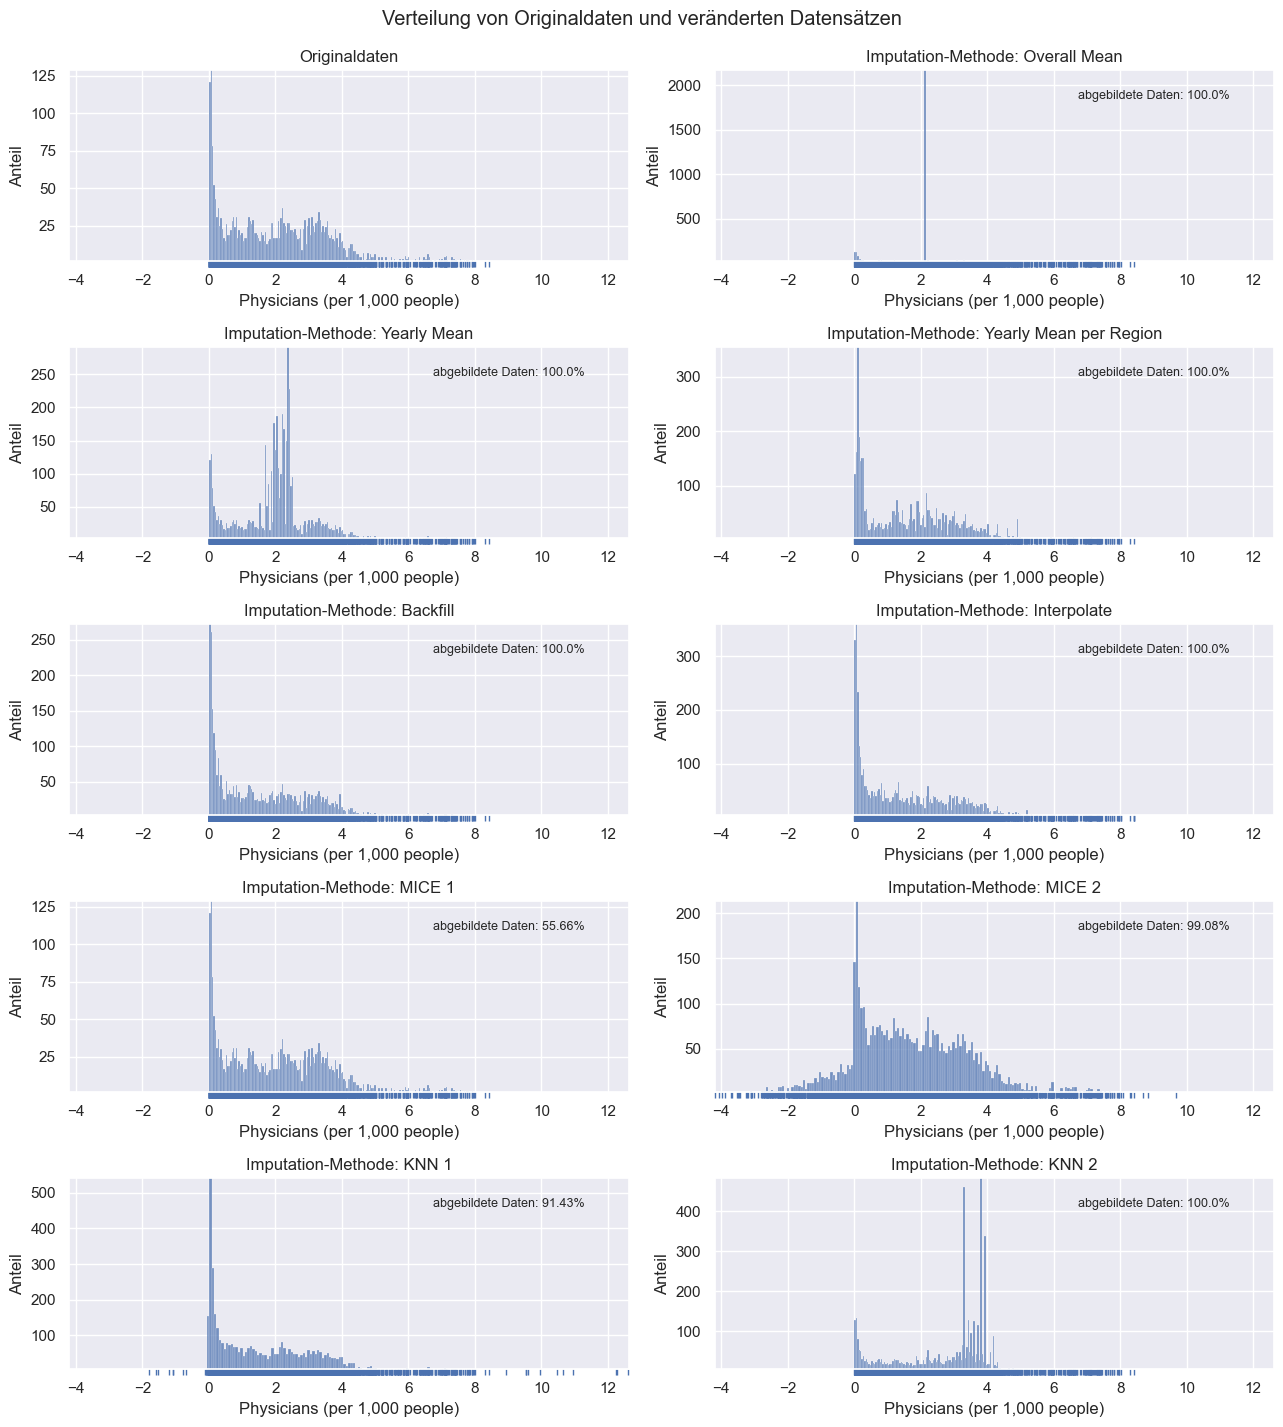

In [7]:
x='Physicians (per 1,000 people)'
sns.set_theme()
#sns.set_palette("tab10")

fig, axs = plt.subplots(5,2, figsize=(13, 15))
axs = axs.ravel()


df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])

#define boundaries around original data
df_min = df_base.stack().min()
df_max = df_base.stack().max()
xmin = df_min-(df_max-df_min)*0.5
xmax = df_max+(df_max-df_min)*0.5

sns.histplot(data=df_base.stack(), bins=200, stat='count', legend=False, ax=axs[0])
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=axs[0])
axs[0].set_title('Originaldaten')
axs[0].set_ylabel('Anteil')
axs[0].set_xlabel(x)
axs[0].set_xlim(xmin, xmax)


for idx, (name, df) in enumerate(sets.items()):
    df_i = df.loc[df['Indicator Name']==x].set_index(['Country Name', 'Indicator Name']).stack()
    total =len(df_i)
    df_i = df_i.loc[(df_i>xmin) & (df_i<xmax)]
    frac =len(df_i)
    sns.histplot(data=df_i, bins=200, stat='count', legend=False, ax=axs[idx+1])
    sns.rugplot(data=df_i, height=-.03, clip_on=False, ax=axs[idx+1])
    axs[idx+1].text(0.65, 0.9, f"abgebildete Daten: {round((frac/total)*100, 2)}%", 
                    ha="left", va="top", transform=axs[idx+1].transAxes, fontsize=9)

    axs[idx+1].set_title(f'Imputation-Methode: {name}')
    axs[idx+1].set_ylabel('Anteil')
    axs[idx+1].set_xlabel(x)
    axs[idx+1].set_xlim(xmin, xmax)
    
plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout(rect=[0, 0.03, 1, 0.99])

In [8]:
x='Armed forces personnel (% of total labor force)'